In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense , Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras import datasets, layers, models
import pathlib
import cv2
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_idg = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip = True,
)
test_idg = ImageDataGenerator(
    rescale = 1./255.
)

In [3]:
IMG_SIZE = (224, 224)

train = train_idg.flow_from_directory('C:\\Users\\KESHAV\\Documents\\PRAXIS\\Capstone\\Pnemonia\\pneumoniadata\\train', 
                                      class_mode='binary',
                                      color_mode="grayscale",
                                      target_size = IMG_SIZE
                                     )
test = test_idg.flow_from_directory('C:\\Users\\KESHAV\\Documents\\PRAXIS\\Capstone\\Pnemonia\\pneumoniadata\\test', 
                                    class_mode='binary',
                                    color_mode="grayscale",
                                    target_size = IMG_SIZE
                                   )

Found 4148 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [4]:
DATADIR ="'C:\\Users\\KESHAV\\Documents\\PRAXIS\\Capstone\\Pnemonia\\pneumoniadata\\train"


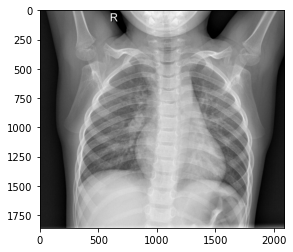

In [5]:

# Loading the data from the drive and saving it to Categories
DATADIR ="C:\\Users\\KESHAV\\Documents\\PRAXIS\\Capstone\\Pnemonia\\pneumoniadata\\train"
CATEGORIES = ['NORMAL','BAC_PNEUMONIA','VIR_PNEUMONIA']

# a loop to read 1 image of a category to check if the code would work 

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap= 'gray')
        plt.show()
        break
    break

In [6]:
CATEGORIES = ['NORMAL','BAC_PNEUMONIA','VIR_PNEUMONIA']

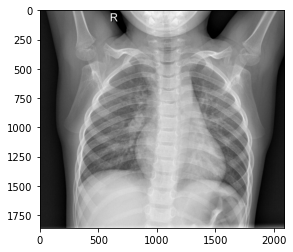

In [7]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap= 'gray')
        plt.show()
        break
    break

In [8]:
training_data = []
IMG_SIZE = 100
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
            except:
                continue
            training_data.append([new_array,class_num])

create_training_data()

In [9]:
len(training_data)

4148

In [10]:
X = []
y = []

In [11]:
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

In [12]:
X.shape

(4148, 100, 100, 3)

In [13]:
len(X),len(y)

(4148, 4148)

In [14]:
len(y)

4148

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)

### ANN

In [40]:
# defining an Artificial Nueral Network

ann = models.Sequential([
        layers.Flatten(input_shape=(100,100,3)),
        layers.Dense(800, activation='relu'), # hidden layers of 600 neurons and activation function 'relu'
        layers.Dense(800, activation='relu'),
        layers.Dense(800, activation='relu'),
        layers.Dense(800, activation='relu'),
        # layers.Dense(800, activation='relu'),
        # layers.Dense(800, activation='relu'),
        # layers.Dense(800, activation='relu'),
        # layers.Dense(800, activation='relu'),
        layers.Dense(3, activation='softmax')    
    ])

#compiling the model using optimizer 'Strochastic Gradient Descent',
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
ann.fit(np.array(X_train),np.array(y_train), epochs=10)

Epoch 1/10
91/91 [==============================] - 15s 149ms/step - loss: 2.1810 - accuracy: 0.5074
Epoch 2/10
91/91 [==============================] - 16s 179ms/step - loss: 0.6643 - accuracy: 0.6996
Epoch 3/10
91/91 [==============================] - 15s 161ms/step - loss: 0.5396 - accuracy: 0.7633
Epoch 4/10
91/91 [==============================] - 15s 163ms/step - loss: 0.5636 - accuracy: 0.7571
Epoch 5/10
91/91 [==============================] - 13s 145ms/step - loss: 0.5366 - accuracy: 0.7582
Epoch 6/10
91/91 [==============================] - 14s 157ms/step - loss: 0.4968 - accuracy: 0.7816
Epoch 7/10
91/91 [==============================] - 12s 137ms/step - loss: 0.5523 - accuracy: 0.7499
Epoch 8/10
91/91 [==============================] - 12s 136ms/step - loss: 0.5009 - accuracy: 0.7792
Epoch 9/10
91/91 [==============================] - 12s 137ms/step - loss: 0.4752 - accuracy: 0.7878
Epoch 10/10
91/91 [==============================] - 13s 137ms/step - loss: 0.4618 - accura

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

39/39 [==============================] - 2s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       412
           1       0.73      0.84      0.78       408
           2       0.80      0.50      0.61       425

    accuracy                           0.77      1245
   macro avg       0.77      0.77      0.76      1245
weighted avg       0.77      0.77      0.76      1245



### CNN - 1

In [19]:
#running a cnn model
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    
    

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [20]:
cnn.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(np.array(X_train), np.array(y_train), epochs=15)

Epoch 1/15
91/91 [==============================] - 16s 170ms/step - loss: 0.9229 - accuracy: 0.5536
Epoch 2/15
91/91 [==============================] - 16s 171ms/step - loss: 0.6580 - accuracy: 0.7220
Epoch 3/15
91/91 [==============================] - 16s 179ms/step - loss: 0.5428 - accuracy: 0.7778
Epoch 4/15
91/91 [==============================] - 16s 176ms/step - loss: 0.4755 - accuracy: 0.8019
Epoch 5/15
91/91 [==============================] - 17s 182ms/step - loss: 0.4160 - accuracy: 0.8274
Epoch 6/15
91/91 [==============================] - 17s 185ms/step - loss: 0.3995 - accuracy: 0.8329
Epoch 7/15
91/91 [==============================] - 17s 187ms/step - loss: 0.3710 - accuracy: 0.8546
Epoch 8/15
91/91 [==============================] - 17s 185ms/step - loss: 0.3476 - accuracy: 0.8567
Epoch 9/15
91/91 [==============================] - 17s 185ms/step - loss: 0.3276 - accuracy: 0.8725
Epoch 10/15
91/91 [==============================] - 17s 189ms/step - loss: 0.3174 - accura

In [22]:
cnn.evaluate(np.array(X_test),np.array(y_test))

39/39 [==============================] - 2s 49ms/step - loss: 0.4267 - accuracy: 0.8466


[0.4266754984855652, 0.8465863466262817]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:10]

39/39 [==============================] - 2s 48ms/step


array([[9.8030788e-01, 1.3953255e-03, 1.8296789e-02],
       [9.9993908e-01, 1.8627903e-05, 4.2298674e-05],
       [1.5390521e-03, 7.4920267e-01, 2.4925828e-01],
       [3.1069332e-05, 9.4939798e-01, 5.0570928e-02],
       [9.9993503e-01, 1.2013022e-05, 5.2910102e-05],
       [9.9652147e-01, 1.5002982e-05, 3.4635558e-03],
       [6.5431948e-04, 9.2096729e-05, 9.9925357e-01],
       [9.9999702e-01, 3.0575194e-08, 2.9244225e-06],
       [9.9971873e-01, 8.6555274e-06, 2.7259166e-04],
       [4.2913455e-04, 6.8967617e-01, 3.0989465e-01]], dtype=float32)

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

39/39 [==============================] - 2s 48ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       415
           1       0.84      0.79      0.81       413
           2       0.78      0.80      0.79       417

    accuracy                           0.85      1245
   macro avg       0.85      0.85      0.85      1245
weighted avg       0.85      0.85      0.85      1245



In [27]:
cnn.save('model.h5')


### CNN - 2

Found 4148 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


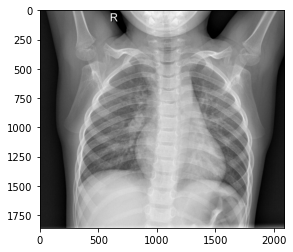

Epoch 1/15
91/91 [==============================] - 23s 239ms/step - loss: 0.8928 - accuracy: 0.5863
Epoch 2/15
91/91 [==============================] - 23s 258ms/step - loss: 0.6060 - accuracy: 0.7485
Epoch 3/15
91/91 [==============================] - 24s 263ms/step - loss: 0.4944 - accuracy: 0.7992
Epoch 4/15
91/91 [==============================] - 21s 236ms/step - loss: 0.4291 - accuracy: 0.8205
Epoch 5/15
91/91 [==============================] - 24s 260ms/step - loss: 0.3795 - accuracy: 0.8384
Epoch 6/15
91/91 [==============================] - 23s 249ms/step - loss: 0.3596 - accuracy: 0.8453
Epoch 7/15
91/91 [==============================] - 22s 238ms/step - loss: 0.3395 - accuracy: 0.8570
Epoch 8/15
91/91 [==============================] - 22s 247ms/step - loss: 0.3150 - accuracy: 0.8698
Epoch 9/15
91/91 [==============================] - 23s 252ms/step - loss: 0.2974 - accuracy: 0.8784
Epoch 10/15
91/91 [==============================] - 24s 259ms/step - loss: 0.2852 - accura

In [49]:
train_idg = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip = True,
)
test_idg = ImageDataGenerator(
    rescale = 1./255.
)

IMG_SIZE = (224, 224)

train = train_idg.flow_from_directory('C:\\Users\\KESHAV\\Documents\\PRAXIS\\Capstone\\Pnemonia\\pneumoniadata\\train', 
                                      class_mode='binary',
                                      color_mode="grayscale",
                                      target_size = IMG_SIZE
                                     )
test = test_idg.flow_from_directory('C:\\Users\\KESHAV\\Documents\\PRAXIS\\Capstone\\Pnemonia\\pneumoniadata\\test', 
                                    class_mode='binary',
                                    color_mode="grayscale",
                                    target_size = IMG_SIZE
                                   )



DATADIR ="C:\\Users\\KESHAV\\Documents\\PRAXIS\\Capstone\\Pnemonia\\pneumoniadata\\train"
CATEGORIES = ['NORMAL','BAC_PNEUMONIA','VIR_PNEUMONIA']


    
    


In [51]:
training_data = []
IMG_SIZE = 224
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
            except:
                continue
            training_data.append([new_array,class_num])

create_training_data()

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train = X_train/255
X_test = X_test/255
X_train = np.array(X_train)
X_test = np.array(X_test)

        

In [52]:
#running a cnn model
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    #layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    #layers.MaxPooling2D((3, 3)),
    
    #layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    #layers.MaxPooling2D((3, 3)),
    
   
    
    

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])   

In [53]:
cnn.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(np.array(X_train), np.array(y_train), epochs=15)

Epoch 1/15
91/91 [==============================] - 114s 1s/step - loss: 0.8297 - accuracy: 0.6459
Epoch 2/15
91/91 [==============================] - 106s 1s/step - loss: 0.5325 - accuracy: 0.7961
Epoch 3/15
91/91 [==============================] - 92s 1s/step - loss: 0.4350 - accuracy: 0.8329
Epoch 4/15
91/91 [==============================] - 89s 975ms/step - loss: 0.3780 - accuracy: 0.8581
Epoch 5/15
91/91 [==============================] - 92s 1s/step - loss: 0.3455 - accuracy: 0.8708
Epoch 6/15
91/91 [==============================] - 92s 1s/step - loss: 0.3255 - accuracy: 0.8739
Epoch 7/15
91/91 [==============================] - 92s 1s/step - loss: 0.3056 - accuracy: 0.8805
Epoch 8/15
91/91 [==============================] - 92s 1s/step - loss: 0.2779 - accuracy: 0.8936
Epoch 9/15
91/91 [==============================] - 94s 1s/step - loss: 0.2630 - accuracy: 0.8953
Epoch 10/15
91/91 [==============================] - 100s 1s/step - loss: 0.2433 - accuracy: 0.9046
Epoch 11/15
9

In [54]:
cnn.evaluate(np.array(X_test),np.array(y_test))

y_pred = cnn.predict(X_test) 
            
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))    

39/39 [==============================] - 9s 235ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       423
           1       0.84      0.84      0.84       401
           2       0.83      0.78      0.80       421

    accuracy                           0.86      1245
   macro avg       0.86      0.86      0.86      1245
weighted avg       0.86      0.86      0.86      1245



## Extra

In [50]:


#running a cnn model
cnn = models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((3, 3)),

    #layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    #layers.MaxPooling2D((3, 3)),
    
    #layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    #layers.MaxPooling2D((3, 3)),
    
   
    
    

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])   


cnn.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(np.array(X_train), np.array(y_train), epochs=15)

cnn.evaluate(np.array(X_test),np.array(y_test))

y_pred = cnn.predict(X_test) 
            
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))            

Epoch 1/15
91/91 [==============================] - 24s 243ms/step - loss: 0.9040 - accuracy: 0.5642
Epoch 2/15
91/91 [==============================] - 22s 240ms/step - loss: 0.6015 - accuracy: 0.7561
Epoch 3/15
91/91 [==============================] - 25s 277ms/step - loss: 0.4959 - accuracy: 0.7940
Epoch 4/15
91/91 [==============================] - 25s 272ms/step - loss: 0.4258 - accuracy: 0.8209
Epoch 5/15
91/91 [==============================] - 24s 269ms/step - loss: 0.3952 - accuracy: 0.8347
Epoch 6/15
91/91 [==============================] - 24s 263ms/step - loss: 0.3622 - accuracy: 0.8457
Epoch 7/15
91/91 [==============================] - 24s 260ms/step - loss: 0.3411 - accuracy: 0.8646
Epoch 8/15
91/91 [==============================] - 25s 271ms/step - loss: 0.3219 - accuracy: 0.8636
Epoch 9/15
91/91 [==============================] - 23s 253ms/step - loss: 0.2998 - accuracy: 0.8801
Epoch 10/15
91/91 [==============================] - 22s 247ms/step - loss: 0.2875 - accura